# 파이썬으로 수질 데이터 분석 및 시각화하기!!




# 안녕하세요 수강생 여러분?

# 이번 시간에는 수질 데이터 분석(WATER QUALITY ANALYSIS)을 해 보도록 하겠습니다. 😊


---



## * 파이썬 코드는 GOOGLE COLAB 에서 실행하도록 합니다.
=> http://colab.research.google.com





## * 실습 파일은 github 또는 강의게시판에 있습니다.
=> github: http://github.com/dscoool/waterai/
=> eCampus:

## 코드를 입력하며 같이 실습해 보도록 합시다!



---


## 실습을 할 때 주의할 점 - 반드시 손으로 코드를 일일히 타이핑해서 입력해 보고, **CTRL C + V 를 사용하지 마세요!! </br>
### **코드를 복붙하면 실력이 늘지 않습니다!! </br>
단, http 주소 등은 복사, 붙여넣기 해도 되어요.





In [1]:
import numpy as np # 넘파이 - 수치 계산 라이브러리를 불러옵니다.
import pandas as pd # 판다스 - 데이터 처리, CSV 파일 입출력 라이브러리를 불러옵니다. (e.g. pd.read_csv)
import seaborn as sns # seaborn - 데이터 시각화 라이브러리입니다.
import matplotlib.pyplot as plt # matplotlib - 그래프 관련 라이브러리입니다.


# 수질 데이터
# Water Quality

안전한 식수에 대한 접근은 건강, 기본적인 인권 및 건강 보호를 위한 효과적인 정책의 구성요소인 건강에 필수적입니다. 이는 국가, 지역 및 지역 차원에서 보건 및 개발 문제로서 중요합니다. 일부 지역에서는 부작용 및 의료 비용 감소가 개입 비용을 초과하기 때문에 물 공급 및 위생에 대한 투자가 순수 경제적 이익을 창출할 수 있는 것으로 나타났습니다.

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.


1. [데이터 불러오기 및 앞부분 출력하기](#1)
[Load and Check Data](#1)

1. [각 데이터 컬럼 설명](#2)
[Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [문자 변수](#4)
        [Categorical Variable](#4)
        * [숫자 변수](#5)

1. [결측치](#6)
[Missing Value](#6)
    * [결측치 찾기](#7)
    [Find Missing Value](#7)

    * [결측치 대체하기](#8)
    [Fill Missing Value](#8)

1. [시각화](#9)
[Visualization](#9)    
---
1. [모델링](#10)

[Modeling](#10)

1. [결과](#11)
 [Summary](#11)


<a id = "1"></a><br>
# 1. 데이터 불러오기 및 앞부분 출력

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/dscoool/waterai/main/water_potability.csv") # 원본 파일의 url을 통해 파일을 불러옵니다.


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [10]:
data # 데이터를 저장하고 있는 변수, 'data'를 입력하고 실행해 봅시다!!

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [11]:
data.head(10) # .head(10) 명령어는 데이터의 맨 앞 10줄을 보여줍니다. 숫자 변경 가능.

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


데이터를 쭉 살펴봅시다. 이 데이터는 어떤 데이터인가요?

원본 출처: https://www.kaggle.com/code/mustafaalkaan/water-quality-explanatory-data-analysis


In [8]:
data.describe() #데이터의 통계를 내 봅니다. 데이터를 묘사(describe)하는 명령입니다.

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


count는 데이터의 개수,</br>
mean은 평균, </br>
std는 표준편차, </br>
min은 최소값, </br>
25%는 1번째 quartile (25% 순위에 해당하는 값),</br>
50%는 2번째 quartile (중앙값),</br>
75%는 3번째 quartile (75% 순위에 해당하는 값),</br>
max 는 최대값을 말합니다.</br>

<a id = "2"></a><br>
# 2. 각 데이터 컬럼 설명

* pH: 산성/알칼리성 수치
* Hardness: 수질 경도
* Solids: 고형분
* Chloramines: 염소
* Sulfate: 황산염
* Conductivity: 전도도
* Organic Carbon: 유기탄소
* Trihalomethanes: 화학 물질
* Turbidity: 탁도
* Potability: 음용성, 마실 수 있는지 여부. 1은 마실 수 있음, 0은 마실 수 없음을 나타냄.

* pH : Acidity of water.
* Hardness: Hardness of water.
* Solids : Solids dissolved in water.
* Chloramines: Chloramines dissolved in water.
* Sulfate : Sulfate contained in water.
* Conductivity: Conductivity of electric of water.
* Organic Carbon : Organic Carbon dissolved in water.
* Trihalomethanes: Trihalomethanes are chemicals that may be found in water.
* Turbidity: Measure of light emitting.
* Potability: Classification of water if it is healthy or not. 1 is healthy, 0 is unhealthy.

In [9]:
data.info() # 데이터의 변수형을 나타냅니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


.info() 명령어는 데이터의 변수형 및 개수, Null이 아닌 개수를 나타냅니다.

* Non-null Count: 빈칸이 아닌 데이터의 수
* Dtype: 열의 데이터 타입
float64 = 64비트 실수(real number)
int = 정수(integer)


<a id = "3"></a><br>
# 3. 변수 분석
# Univariate Variable Analysis

* 문자열 변수: 포텐셜
* 숫자 변수: pH, 경도, 고체, 클로라민, 황산염, 전도도, 유기탄소, 트리할로메탄, 혼탁도
* Categorical Variable: Potability
* Numerical Variable: pH, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic Carbon, Trihalomethanes, Turbidity

<a id = "4"></a><br>
## 4. 문자 변수
## Categorical Variable

음용가능 / 음용불가능을 그래프로 그려 봅시다!!

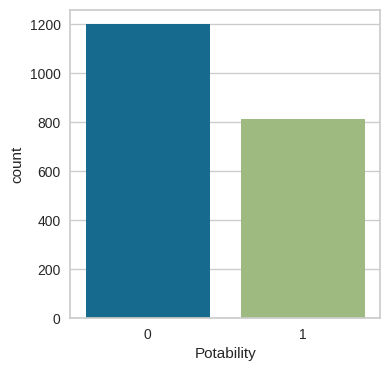

In [50]:
plt.figure(figsize = (4,4)) # 그래프 크기= 4x4로 지정합니다. 여기서 4는 사이즈입니다.
sns.countplot(data = data, x = data["Potability"]) # data와 x축의 이름을 지정합니다.
plt.show() # .show() 명령으로 그래프를 화면에 출력합니다.

Potability에 대한 0(음용불가) / 1(음용가능) 결과 출력.

[link text](https://)* We clearly see that our data is not balanced.

<a id = "5"></a><br>
## 숫자 변수
## Numerical Variables:
데이터 컬럼 중 숫자로 이루어진 컬럼은 아래와 같습니다:
* pH
* Hardness
* Solids
* Chloramines
* Sulfate
* Conductivity
* Organic Carbon
* Trihalomethanes
* Turbidity

위 변수의 분포를 알아보기 위해, 히스토그램(Histogram)을 그려 봅시다!!

In [12]:
def histplot(var): # 히스토그램을 그려 주는 함수를 정의(define)합니다.
    plt.figure(figsize = (6,3)) # 도표의 크기를 지정합니다. 여기서는 (가로 6 x 세로 3)
    sns.histplot(data = data, x = data[var], hue = data.Potability)
    plt.xlabel(var) # x 축 이름을 써 줍니다. 여기서는 var
    plt.ylabel("count") # y축 이름을 써 줍니다. 여기서는 count.
    plt.show() # .show() 명령어를 사용하면 도표(그림)을 그립니다.

먼저, 'ph' 컬럼을 대입하여 위 histoplot() 함수를 실행시켜 봅시다!!


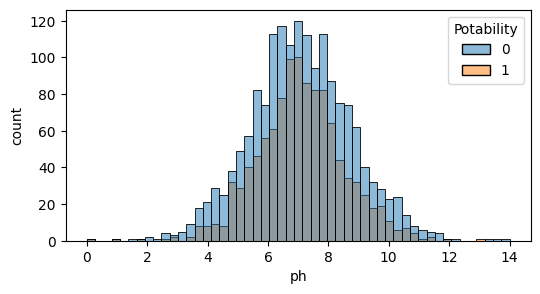

In [15]:
    histplot('ph') # ph 컬럼에 대한 히스토그램을 그립니다.


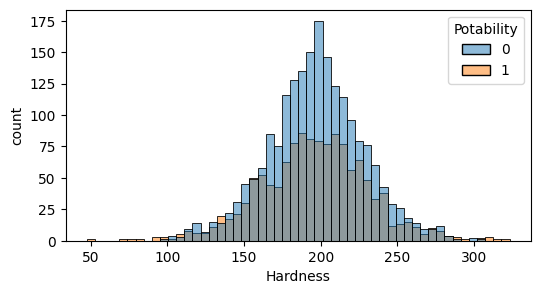

In [16]:
    histplot('Hardness') # Hardness 컬럼에 대한 히스토그램을 그립니다.


In [19]:
# 데이터 컬럼 중 숫자로 된 컬럼을 전부 나열합니다. 문자 컬럼은 빼 줍니다. => numvars.
# 숫자 컬럼을 아래 'numvars' 변수에 저장합니다.
# 이것으로 for문을 돌릴 예정입니다.
numvars = ["ph","Hardness","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]


In [21]:
numvars #numvars 의 값을 체크합시다!!

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

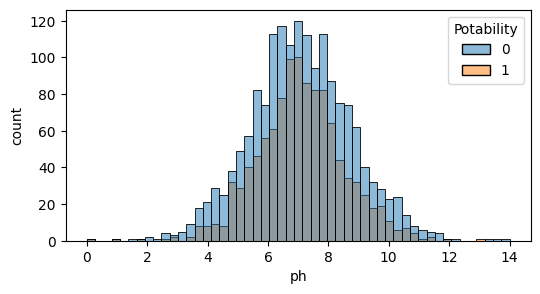

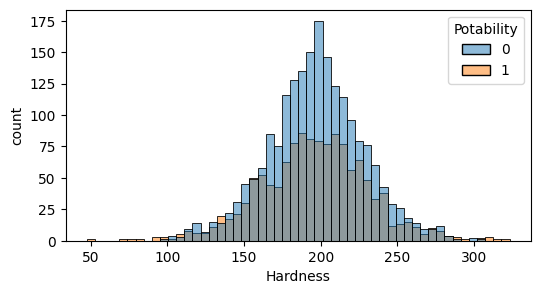

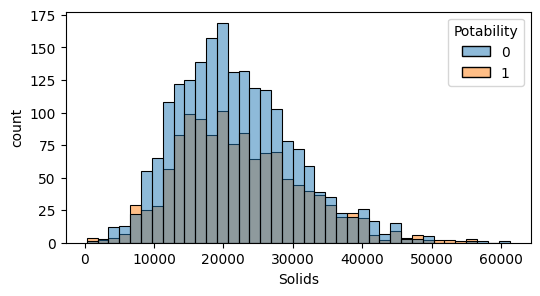

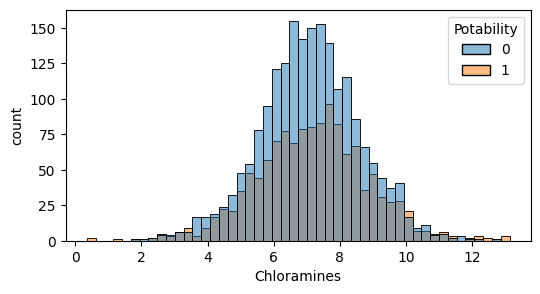

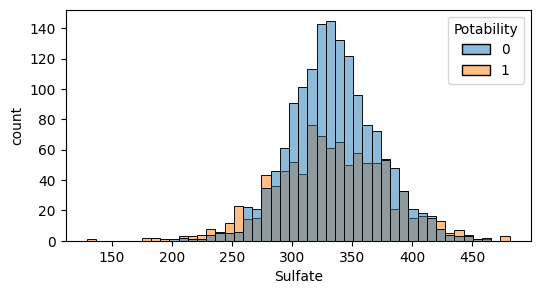

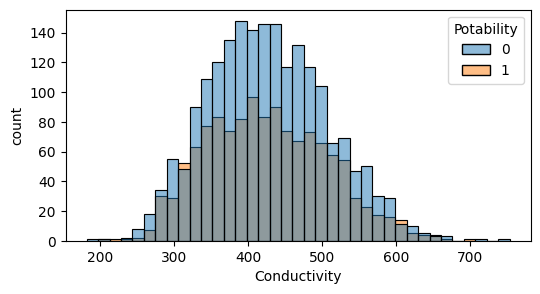

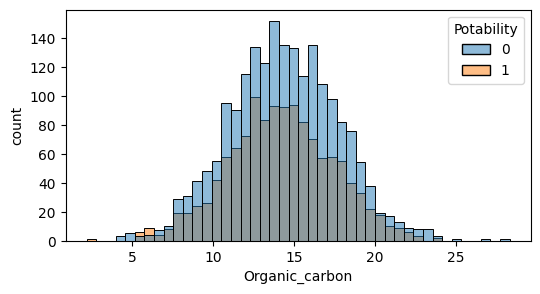

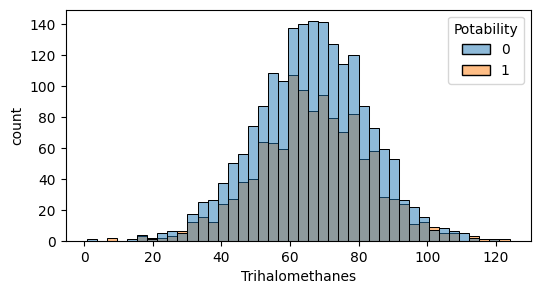

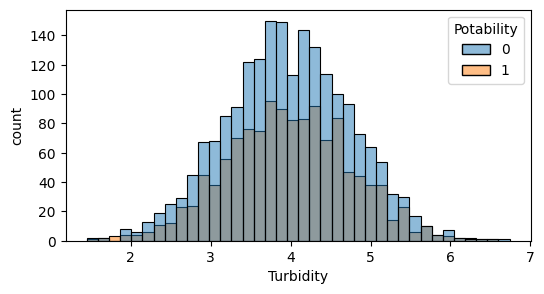

Ellipsis

In [23]:
# 자, for문이 나옵니다.
# numvars에 있는 "ph","Hardness","Solids", ... 를 n에 대입하고, 순서대로 실행합니다.
# 첫 번째 실행에서는 n = 'ph' 인 상태로 histoplot(n)을 실행합니다.
for n in numvars:
    histplot(n)

# 두 번째 실행에서는 n='Hardness"인 상태로 histoplot(n)을 실행합니다.
...
# 아홉 번째 실행에서는 n= 'Turbidity'인 상태로 histoplot(n)을 실행합니다.
# 아래 아홉 개의 histogram을 그립니다.

<a id = "6"></a><br>
# 6. 결측치
# Missing Value

결측치란 없는 값 (N/A, Na, NaN, None)을 말합니다.

<a id = "7"></a><br>
## 7. 결측치 찾기
## Find Missing Value

.isnull() 명령어를 사용합니다.

* is it Null? = Null(None) 값입니까? 로 이해하면 좋습니다.


In [24]:
data.isnull() # .isnull()
# True이면 Null값
# False이면 Not Null (빈칸 아님)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


.isnull().sum() 으로 컬럼 별 null값의 개수를 세어 봅시다.

In [25]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<a id = "8"></a><br>

## 8. 결측치 제거
## Deleting Missing Values

.dropna() 는 값이 na인 행을 제거(delete)합니다.
그리고 다시 isnull().sum() 값을 이용하여 Null값인 전체 행의 개수를 세어 봅시다.

In [26]:
data = data.dropna()
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

결측치를 모두 제거하였습니다.

<a id = "9"></a><br>
# 9. 시각화
# Visualization

사용할 컬럼(열)을 고릅니다. 숫자로 된 열만 처리하겠습니다.

In [46]:
numvars = ["ph","Hardness","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]


한 도표에 가로 3개, 세로 3개의 빈 그래프를 그립니다. </br>
그래프의 사이즈를 미리 지정합니다.  </br>
여기서는 도표 한 개가 가로 9, 세로 9의 사이즈입니다. </br>

---





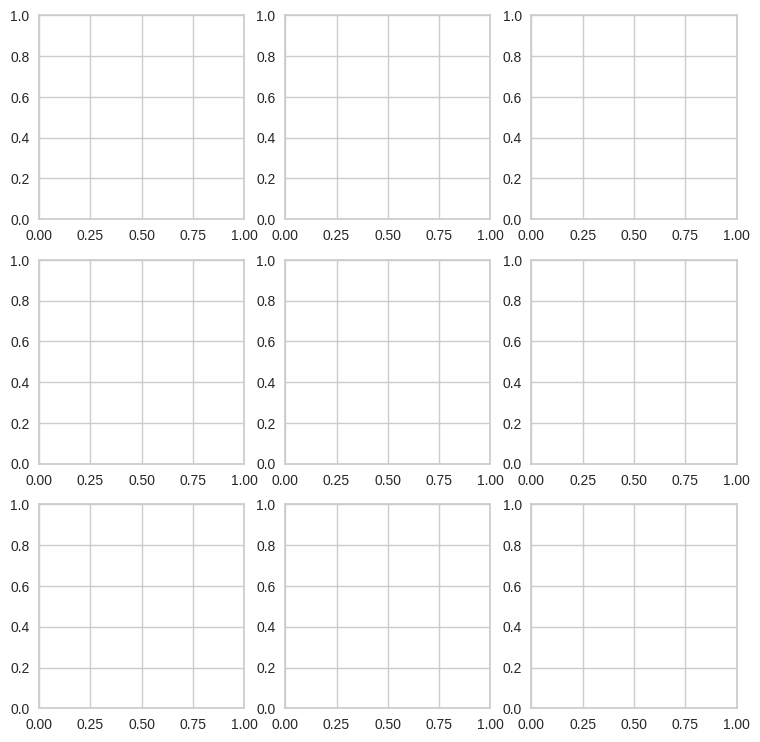

In [47]:
fig, axes = plt.subplots(3, 3, figsize=(9,9)) # 각각 사이즈가 9x9 인 그래프 3 x 3개


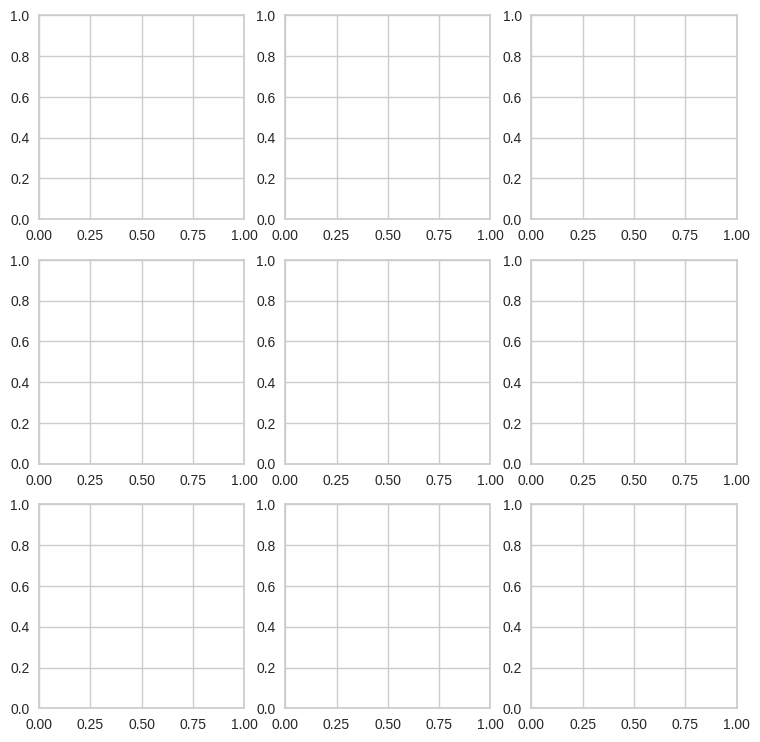

In [42]:
fig #fig의 내용을 살펴봅시다. fig는 도표(그래프)를 나타내는 변수임을 알 수 있어요.

In [43]:
axes # axes의 내용을 살펴봅시다. axes는 각각의 그래프에 대한 정보를 담고 있습니다.

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

전체를 실행시켜 보겠습니다.

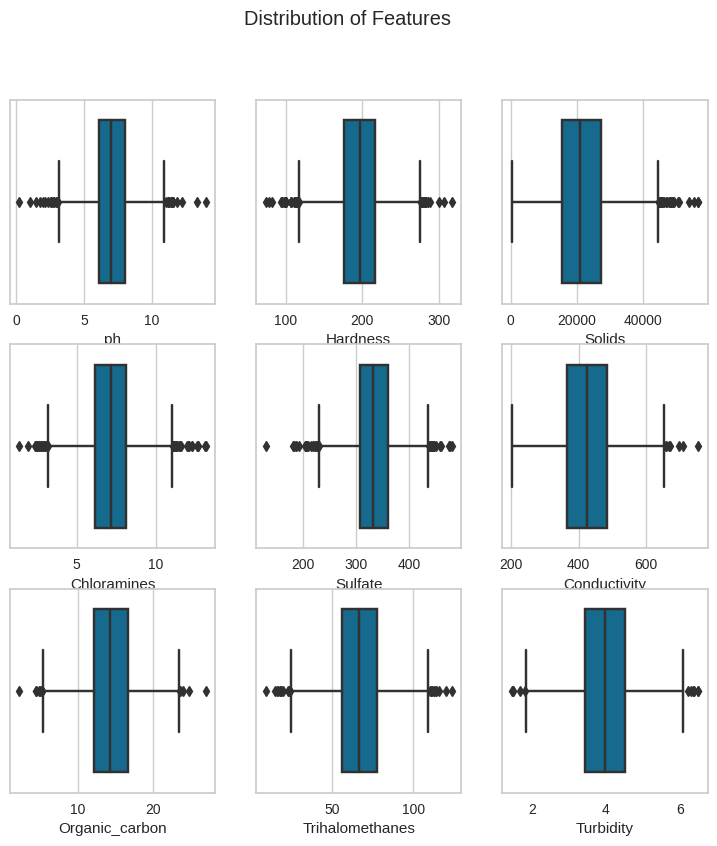

In [45]:
numvars = ["ph","Hardness","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]
fig, axes = plt.subplots(3, 3, figsize=(9,9))

fig.suptitle('Distribution of Features')
plt.grid()
sns.boxplot(ax=axes[0, 0], data=data, x='ph')
sns.boxplot(ax=axes[0, 1], data=data, x='Hardness')
sns.boxplot(ax=axes[0, 2], data=data, x='Solids')
sns.boxplot(ax=axes[1, 0], data=data, x='Chloramines')
sns.boxplot(ax=axes[1, 1], data=data, x='Sulfate')
sns.boxplot(ax=axes[1, 2], data=data, x='Conductivity')
sns.boxplot(ax=axes[2, 0], data=data, x='Organic_carbon')
sns.boxplot(ax=axes[2, 1], data=data, x='Trihalomethanes')
sns.boxplot(ax=axes[2, 2], data=data, x='Turbidity')
plt.show()

BOX 플롯 설명

최대값(max)
75% 분위값
중앙값
25% 분위값
최소값(min)

을 나타냅니다.

<img src = "https://github.com/dscoool/waterai/blob/main/boxplot_image.png?raw=true">

파이썬 첫시간은 여기까지입니다!!

수고하셨습니다!!

---



<a id = "10"></a><br>
# 10. 모델링 (생략)
# Modeling

아래는 여러 가지 기계학습 모델을 사용하여
데이터를 학습/검증/테스트하는 부분입니다.

오늘 수업에서는 아래 부분은 실습하지 않겠습니다.

In [28]:
!pip install pycaret # pip install => 라이브러리를 설치하는 명령어입니다.
# !pip install pandas => pandas 라이브러리를 자동으로 다운받아 설치합니다.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00

In [29]:
from pycaret.classification import *
clf = setup(data, target = "Potability", session_id = 786)
compare_models()

,Description,Value
0,Session id,786
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(2011, 10)"
4,Transformed data shape,"(2011, 10)"
5,Transformed train set shape,"(1407, 10)"
6,Transformed test set shape,"(604, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6802,0.6956,0.3952,0.6778,0.4977,0.2870,0.3100,0.7590
rf,Random Forest Classifier,0.6780,0.6844,0.4040,0.6696,0.5024,0.2854,0.3063,1.4560
qda,Quadratic Discriminant Analysis,0.6745,0.7091,0.3866,0.6795,0.4879,0.2746,0.3013,0.1060
gbc,Gradient Boosting Classifier,0.6489,0.6554,0.3581,0.6232,0.4505,0.2186,0.2397,0.5450
lightgbm,Light Gradient Boosting Machine,0.6432,0.6658,0.4869,0.5719,0.5232,0.2416,0.2453,0.3850
xgboost,Extreme Gradient Boosting,0.6389,0.6581,0.4744,0.5629,0.5129,0.2301,0.2331,0.3580
nb,Naive Bayes,0.6212,0.6280,0.2506,0.5728,0.3474,0.1344,0.1581,0.1180
ridge,Ridge Classifier,0.5984,0.0000,0.0282,0.6267,0.0534,0.0137,0.0499,0.1000
lda,Linear Discriminant Analysis,0.5970,0.5189,0.0299,0.5867,0.0564,0.0115,0.0421,0.0590
dummy,Dummy Classifier,0.5970,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1110


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=786, verbose=0, warm_start=False)

In [30]:
model = create_model("et")
predict = predict_model(model, data=data)
predict.head()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6525,0.6544,0.3509,0.6250,0.4494,0.2238,0.2437
1,0.6879,0.7289,0.3860,0.7097,0.5000,0.3009,0.3304
2,0.6596,0.6682,0.3158,0.6667,0.4286,0.2279,0.2602
3,0.6950,0.7311,0.4035,0.7188,0.5169,0.3188,0.3472
4,0.6454,0.6211,0.3333,0.6129,0.4318,0.2055,0.2257
5,0.6525,0.7076,0.4211,0.6000,0.4948,0.2422,0.2510
6,0.7163,0.7422,0.4737,0.7297,0.5745,0.3758,0.3956
7,0.7143,0.7067,0.4107,0.7667,0.5349,0.3548,0.3909
8,0.7071,0.7133,0.4821,0.6923,0.5684,0.3574,0.3708


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9040,0.9738,0.8126,0.9414,0.8723,0.7961,0.8016


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,prediction_label,prediction_score
3,8.316766,214.373398,22018.417969,8.059333,356.886139,363.266510,18.436525,100.341675,4.628770,0,0,1.00
4,9.092223,181.101517,17978.986328,6.546600,310.135742,398.410828,11.558279,31.997993,4.075076,0,0,1.00
5,5.584086,188.313324,28748.687500,7.544869,326.678375,280.467926,8.399734,54.917862,2.559708,0,0,1.00
6,10.223862,248.071732,28749.716797,7.513409,393.663391,283.651642,13.789696,84.603554,2.672989,0,0,0.62
7,8.635849,203.361526,13672.091797,4.563009,303.309784,474.607635,12.363816,62.798309,4.401425,0,0,1.00


<a id = "11"></a><br>

# 11. 결과
Extra Trees Classifier는 가장 높은 정확도를 보여주는 대부분 알려진 분류 모델 중 하나였습니다. 그래서 저희는 이 모델을 선택하였습니다. 결과적으로 약 90%의 정확도를 얻었습니다. 이 노트북에서는 PyCaret 라이브러리를 사용하였습니다. 이 라이브러리는 지정한 데이터와 특성에 대해 모든 분류 모델을 자동으로 적합시키고 각 모델의 정확도를 반환합니다.

# Summary
Extra Trees Classifier gave the best accuracy around mostly known classifying models. So we decided to go on with it. It turned out %90 of accuracy. I've used PyCaret library in this notebook. It automatically fits all classification models to your specified data and feature and returns all the accuracies for each model.